In [2]:
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json as js

In [3]:
B = pd.read_csv("./data/phase1/label_before.csv")
B = B.rename(columns = {"Unnamed: 2": "label"})
B[B["label"] ==  2].shape[0]  / B.shape[0]

0.3430232558139535

In [4]:
B

,Unnamed: 0,ResponseId,label,suggested_tip_disruption
0,0,R_0uOsLe6BeLnUee5,3,Only assign cooking to server once
1,1,R_10CNCLuGIedQoz2,1,Strategically leave some players idle.
2,2,R_12nnne04OpWcY9q,2,Server shouldn't cook
3,3,R_1C3aMTZKkeXGDUk,2,Don't let Server cook.
4,4,R_1DS9jhDoVpEt1m2,1,Chop before plating
...,...,...,...,...
167,167,R_xA5B0rSmbSjH6XT,2,Always have the sous-chef cook
168,168,R_yjpyDhIt4Ei7bfX,2,Don't let server cook.
169,169,R_yw09VUoOXdh6KA1,6,Only the server should plate
170,170,R_yyU2mNdEqpH2jWp,8,the should prep and cook only


In [5]:
S = pd.read_csv("s1_label.csv")
S.columns = S.iloc[0,:]
S = S.drop(0, axis=0).reset_index().drop("index", axis=1)
S = S.loc[:,["ResponseId", "treatment", "Label"]]
S = S.rename(columns = {"Label":"label"})
S

,ResponseId,treatment,label
0,R_09f8RCjNyCadwPv,s1,3
1,R_0OFNLlTMtF6YuXf,s1,NaN
2,R_0SrUdDhR075sWyZ,s1,NaN
3,R_0dkmFxzVGbM4H17,s1,3
4,R_0kTTXuzLnqZsQzT,s1,2
...,...,...,...
244,R_wZQyUQosD7jAiC5,s1,3
245,R_x3LIwiuSIOWPNN7,s1,6
246,R_yBZYkqf9LaJZxFn,s1,3
247,R_yK1zeitEqOJSgEx,s1,3


In [67]:
S[S["label"] ==  "6"].shape[0]  / S.shape[0]

0.15261044176706828

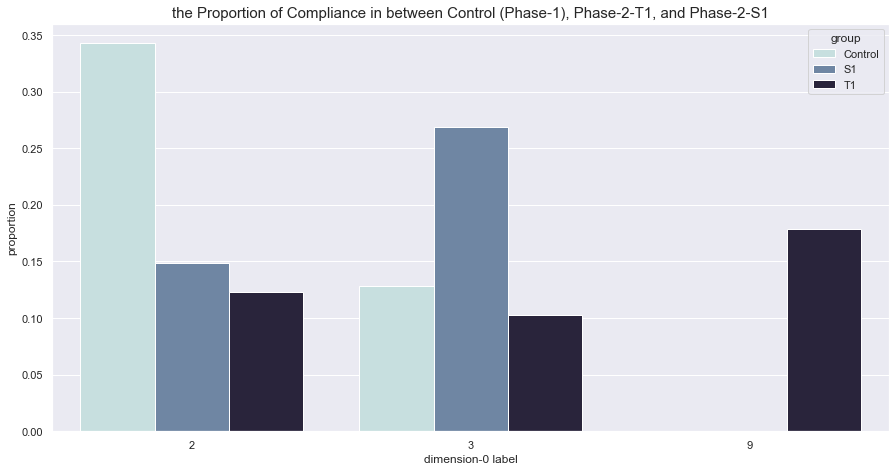

In [106]:
label = np.array([2, 3, 9, 2, 3, 9, 2, 3, 9])
treatment = np.array(["Control"]*3 + ["S1"]*3 + ["T1"]*3)
distri = np.array([0.343, 0.128, 0, 0.149, 0.269, 0.0, 0.123, 0.103, 0.179])
sns.barplot(data = pd.DataFrame({
    "dimension-0 label" : label,
    "group"  :  treatment,
    "proportion" : distri
}), x="dimension-0 label", y="proportion", hue="group", palette = "ch:start=.2,rot=-.3").set_title(
  "the Proportion of Compliance in between Control (Phase-1), Phase-2-T1, and Phase-2-S1",
    fontdict= { 'fontsize': 15})
sns.set(rc={'figure.figsize':(15,7.5)})

In [78]:
T[T["label"] ==  "9"].shape[0]  / T.shape[0]

0.1793103448275862

In [72]:
T = pd.read_csv("./data/phase2/label_after.csv")
T = T.drop(columns = ["Unnamed: 0", "suggested_tip_disrupted"])
T["treatment"]  = ["t1" for _ in np.arange(T.shape[0])]
T.loc[:, ["ResponseId",  "treatment", "label"]]
T["label"] = T["label"].astype(str)
T

,ResponseId,label,treatment
0,R_10HkPUkR6o0qDFT,9,t1
1,R_1JCkfcOwq1eNbLu,9,t1
2,R_1K3WThoBHDDfbk0,9,t1
3,R_1M40hSm4fF4Saxv,9,t1
4,R_1Q5tRaFyI9DwIn4,9,t1
...,...,...,...
285,R_XoEfxfWvLu2dznr,8,t1
286,R_2s5D6EJ0FlMyr39,8,t1
287,R_2Vf01KGZrR5fscp,1,t1
288,R_38EvwAyoLTJRsZP,8,t1


In [57]:
df = pd.concat([S,T])

ConversionError: Failed to convert value(s) to axis units: 0        3
1      NaN
2      NaN
3        3
4        2
      ... 
244      3
245      6
246      3
247      3
248      6
Name: x, Length: 249, dtype: object

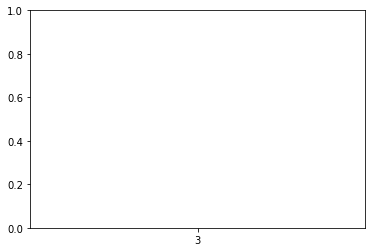

In [60]:
sns.histplot(S, x="label", hue="treatment")